In [ ]:
"""Import libraries"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
!wget https://raw.githubusercontent.com/TomReidNZ/QRC_Datasets/main/graphing.py
import graphing

--2023-03-16 06:18:19--  https://raw.githubusercontent.com/TomReidNZ/QRC_Datasets/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18769 (18K) [text/plain]
Saving to: ‘graphing.py.4’

graphing.py.4       100%[===================>]  18.33K  --.-KB/s    in 0s      

2023-03-16 06:18:19 (105 MB/s) - ‘graphing.py.4’ saved [18769/18769]



In [ ]:
"""Reading the file"""
df=pd.read_csv('hotel_booking.csv')

In [ ]:
"""Visualise the data"""
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
"""looking for duplicate columns"""
df.duplicated().sum()

0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
"""Checking for missing data use the code below"""
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

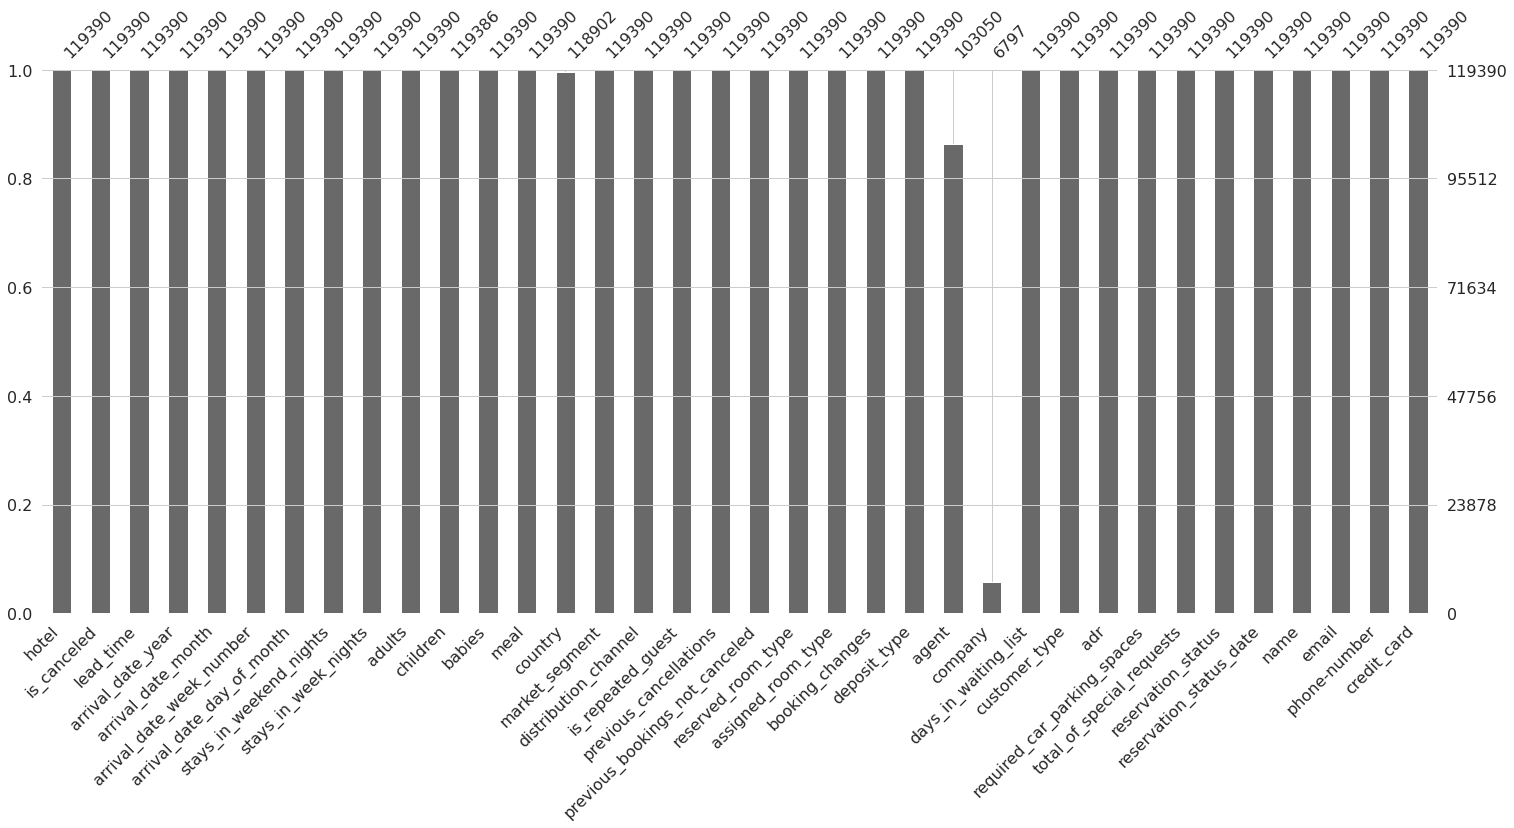

In [ ]:
"""
Here we used the missigno library to visualize if there is any null values 
"""
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
"""Visualising all of the columns"""
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
"""Changing some of the string values in the columns to numerical in order to see the correlation"""

df['hotel_asNumerical'] = pd.Categorical(df['hotel']).codes 
df['arrival_date_month_asNumerical'] = pd.Categorical(df['arrival_date_month']).codes 
df['country_asNumerical'] = pd.Categorical(df['country']).codes                      
df['deposit_type_asNumerical'] = pd.Categorical(df['deposit_type']).codes  
df['customer_type_asNumerical'] = pd.Categorical(df['customer_type']).codes 
df['meal_asNumerical'] = pd.Categorical(df['meal']).codes
df['market_segment_asNumerical'] = pd.Categorical(df['market_segment']).codes
df['distribution_channel_asNumerical'] = pd.Categorical(df['distribution_channel']).codes
df['reservation_status_asNumerical'] = pd.Categorical(df['reservation_status']).codes
df['reservation_status__date_asNumerical'] = pd.Categorical(df['reservation_status_date']).codes
df['name_asNumerical'] = pd.Categorical(df['name']).codes
df['email_asNumerical'] = pd.Categorical(df['email']).codes
df['phone-number_asNumerical'] = pd.Categorical(df['phone-number']).codes
df['credit_card_asNumerical'] = pd.Categorical(df['credit_card']).codes
df['reserved_room_type_asNumerical'] = pd.Categorical(df['reserved_room_type']).codes
df['assigned_room_type_asNumerical'] = pd.Categorical(df['assigned_room_type']).codes
df['children']= df['children'].fillna(0)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


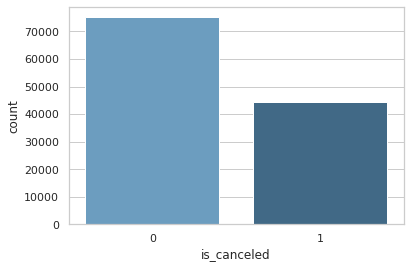

<Figure size 432x288 with 0 Axes>

In [ ]:
"""Visualising the label distribution"""
sns.countplot("is_canceled", data=df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [ ]:
"""check the correlation of the numeric features vs is canceled 
but we need to conver some columns to numerical above"""
df.corr()['is_canceled'].sort_values()

reservation_status_asNumerical         -0.917196
total_of_special_requests              -0.234658
required_car_parking_spaces            -0.195498
assigned_room_type_asNumerical         -0.176028
reservation_status__date_asNumerical   -0.162135
booking_changes                        -0.144381
hotel_asNumerical                      -0.136531
is_repeated_guest                      -0.084793
agent                                  -0.083114
customer_type_asNumerical              -0.068140
reserved_room_type_asNumerical         -0.061282
previous_bookings_not_canceled         -0.057358
babies                                 -0.032491
company                                -0.020642
meal_asNumerical                       -0.017678
arrival_date_day_of_month              -0.006130
phone-number_asNumerical               -0.004342
stays_in_weekend_nights                -0.001791
arrival_date_month_asNumerical         -0.001491
email_asNumerical                      -0.000723
credit_card_asNumeri

<AxesSubplot:>

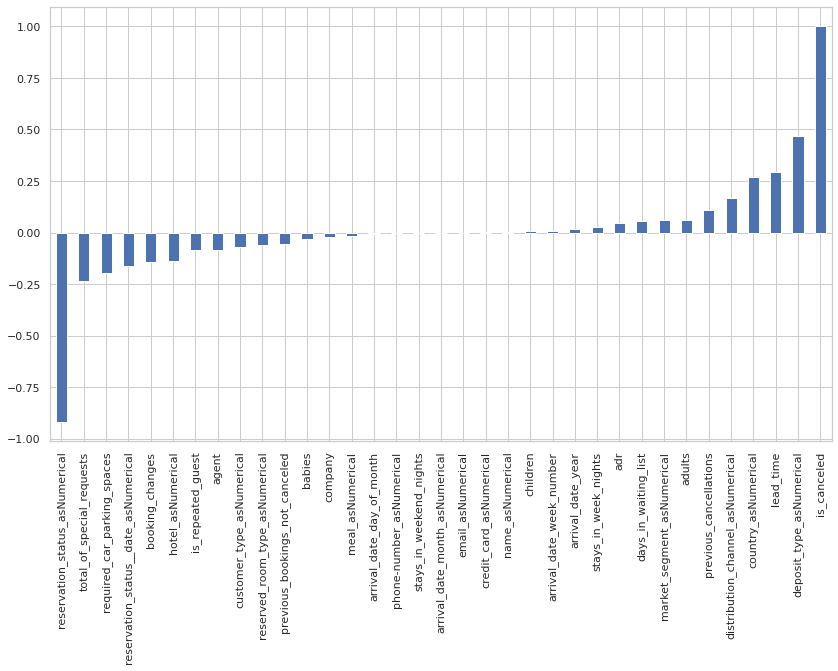

In [ ]:
"""
Visualsing the correlation of features vs the label
"""


plt.figure(figsize=(14,8))
df.corr()['is_canceled'][:-1].sort_values().plot(kind ='bar')

In [ ]:
#see the values inside this column
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
"""let's drop some columns that have lots of NaN values"""
df.drop(['agent','company','country'],axis=1) 
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_asNumerical,distribution_channel_asNumerical,reservation_status_asNumerical,reservation_status__date_asNumerical,name_asNumerical,email_asNumerical,phone-number_asNumerical,credit_card_asNumerical,reserved_room_type_asNumerical,assigned_room_type_asNumerical
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,1,1,121,27015,35035,75446,3322,2,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,3,1,1,121,3977,5471,100703,8157,2,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,3,1,1,122,64151,90298,73273,2734,0,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2,0,1,122,47596,65652,34936,4677,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,6,3,1,123,48754,64565,81218,4498,0,0


In [ ]:
"""let's drop some columns that have little correlation with the label"""
df.drop(['arrival_date_day_of_month','phone-number_asNumerical','stays_in_weekend_nights','arrival_date_month_asNumerical','email_asNumerical','credit_card_asNumerical','name_asNumerical','children','arrival_date_week_number'],axis=1) 
df.head(-5) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_asNumerical,distribution_channel_asNumerical,reservation_status_asNumerical,reservation_status__date_asNumerical,name_asNumerical,email_asNumerical,phone-number_asNumerical,credit_card_asNumerical,reserved_room_type_asNumerical,assigned_room_type_asNumerical
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,1,1,121,27015,35035,75446,3322,2,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,3,1,1,121,3977,5471,100703,8157,2,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,3,1,1,122,64151,90298,73273,2734,0,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2,0,1,122,47596,65652,34936,4677,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,6,3,1,123,48754,64565,81218,4498,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,6,3,1,917,79945,112145,36909,7581,0,0
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,3,1,1,918,8350,9416,1904,795,0,0
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,6,3,1,918,13421,18322,75022,6835,6,6
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,5,3,1,919,39123,5073,73787,6923,0,0


In [ ]:
#create a variable to do many plots at the same time
#features_i_want=['previous_cancellations','lead_time','adults','days_in_waiting_list','country_asNumerical','deposit_type_asNumerical','market_segment_asNumerical','distribution_channel_asNumerical','reservation_status__date_asNumerical','adr']


In [ ]:
# Here Im graphing all the features against the label to see the correlations and then decide which features I will use
#for feature in features_i_want:
#graphing.scatter_2D(df,label_x='features_i_want',label_y='is_canceled',show=True)

In [ ]:

df.groupby(['is_canceled']).count()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_asNumerical,distribution_channel_asNumerical,reservation_status_asNumerical,reservation_status__date_asNumerical,name_asNumerical,email_asNumerical,phone-number_asNumerical,credit_card_asNumerical,reserved_room_type_asNumerical,assigned_room_type_asNumerical
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,75166,75166,75166,75166,75166,75166,75166,75166,75166,75166,...,75166,75166,75166,75166,75166,75166,75166,75166,75166,75166
1,44224,44224,44224,44224,44224,44224,44224,44224,44224,44224,...,44224,44224,44224,44224,44224,44224,44224,44224,44224,44224


In [ ]:
"""Split data into train test sets"""

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.3)

In [ ]:
"""Creating the dataframes for training and test datasets"""
train_df = trainingSet
test_df = testSet

"""Clean the missing values if needed"""
train_df = train_df.dropna() 
test_df = test_df.dropna()


In [ ]:
"""visualizing the test data in this cell"""
test_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_asNumerical,distribution_channel_asNumerical,reservation_status_asNumerical,reservation_status__date_asNumerical,name_asNumerical,email_asNumerical,phone-number_asNumerical,credit_card_asNumerical,reserved_room_type_asNumerical,assigned_room_type_asNumerical
18203,Resort Hotel,0,36,2015,November,45,7,2,6,1,...,2,0,1,258,28583,37954,26036,6656,0,0
31758,Resort Hotel,0,5,2017,January,1,2,1,3,1,...,6,3,1,676,28561,100649,63683,2066,0,0
24280,Resort Hotel,0,0,2016,May,21,15,1,0,2,...,3,3,1,441,68750,87689,49480,4617,0,3
3064,Resort Hotel,1,41,2015,November,46,12,1,3,1,...,2,0,0,252,68279,96266,92878,8165,0,0
31759,Resort Hotel,0,5,2017,January,1,2,1,3,1,...,6,3,1,676,6738,5081,15931,4482,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18313,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,2,0,1,260,77431,104627,35920,8501,4,5
99997,City Hotel,0,256,2016,October,43,16,2,3,2,...,6,3,1,599,30079,40057,87544,3990,0,0
3046,Resort Hotel,0,33,2015,November,46,12,0,3,1,...,2,0,1,258,25176,33423,4010,3582,0,2
30624,Resort Hotel,0,3,2016,November,49,28,1,0,1,...,5,3,1,638,49131,67288,64775,6504,0,3


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


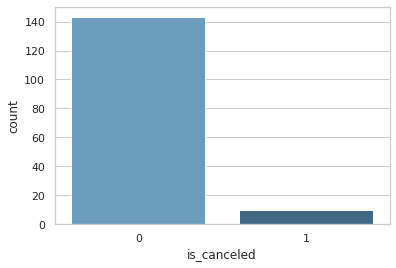

<Figure size 432x288 with 0 Axes>

In [ ]:
"""Visualising the label distribution"""
sns.countplot("is_canceled", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [ ]:
"""visualizing the training data in this cell"""
train_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_asNumerical,distribution_channel_asNumerical,reservation_status_asNumerical,reservation_status__date_asNumerical,name_asNumerical,email_asNumerical,phone-number_asNumerical,credit_card_asNumerical,reserved_room_type_asNumerical,assigned_room_type_asNumerical
3062,Resort Hotel,0,33,2015,November,46,12,0,3,1,...,2,0,1,258,48787,69034,116468,4195,0,2
18245,Resort Hotel,0,35,2015,November,45,6,2,7,1,...,2,0,1,258,61937,1648,69193,7136,4,4
2966,Resort Hotel,0,37,2015,November,46,8,2,5,1,...,2,0,1,258,69299,98674,115932,3279,0,0
27598,Resort Hotel,0,5,2016,August,36,30,0,4,2,...,3,1,1,551,59339,37229,33735,7406,7,7
2954,Resort Hotel,0,36,2015,November,45,7,2,6,1,...,2,0,1,258,71785,101868,67422,4251,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38400,Resort Hotel,0,151,2017,July,28,10,2,5,2,...,5,3,1,868,4142,5446,37043,825,4,4
2881,Resort Hotel,0,24,2015,November,45,3,3,10,1,...,2,0,1,259,31662,46710,34502,3811,0,0
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,2,0,1,259,39624,55811,9905,2824,0,0
24278,Resort Hotel,0,0,2016,May,21,15,1,0,2,...,3,3,1,441,34731,16803,95982,3557,0,3


In [ ]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values
# in this case all the other columns are x features and the y is label is the column Survived and we do this for train and for test
X_train = train_df[['previous_cancellations','lead_time','adults','days_in_waiting_list','country_asNumerical','deposit_type_asNumerical','market_segment_asNumerical','distribution_channel_asNumerical','reservation_status__date_asNumerical','adr']] 	# the column 'Sex_asNumerical' is the one we did to change male and female for 1 and 0

y_train = train_df["is_canceled"]

X_test = test_df[['previous_cancellations','lead_time','adults','days_in_waiting_list','country_asNumerical','deposit_type_asNumerical','market_segment_asNumerical','distribution_channel_asNumerical','reservation_status__date_asNumerical','adr']] 	

y_test = test_df["is_canceled"]



### Model Development and Prediction
Import the Scikit Learn Logistic Regression module 
Fit model on the train set using fit() then perform prediction on test set using prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred = (logreg.predict_proba(X_test)[:,1]>=0.52).astype(bool)# this code is to change the treshold for the probability

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate model using confusion matrix and visualize CFM (confusion matrix) using a heatmap

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

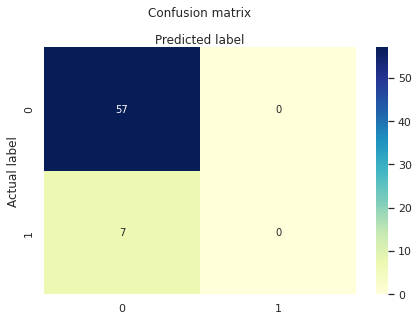

In [ ]:
class_names=['B','M'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("The Accuracy of your Model is:",metrics.accuracy_score(y_test, y_pred))
""" See the results using a classification report"""
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
target_names =['No_cancel','Cancel']
print(classification_report(y_pred,y_test,target_names=target_names))

""" This model has horrible results for class 1 wich is if they will cancel the booking"""


The Accuracy of your Model is: 0.890625
              precision    recall  f1-score   support

   No_cancel       1.00      0.89      0.94        64
      Cancel       0.00      0.00      0.00         0

    accuracy                           0.89        64
   macro avg       0.50      0.45      0.47        64
weighted avg       1.00      0.89      0.94        64



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


' This model has horrible results for class 1 wich is if they will cancel the booking'

#Decision Tree

In [ ]:
"""Decision Tree model"""

# Import the DecisionTreeClassifier class from the scikit-learn library
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(X_train,y_train)

# Use the trained model to make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate and print the accuracy score of the model's predictions
print("The Accuracy of your Model is:",metrics.accuracy_score(y_test, y_pred))
""" See the results using a classification report"""
target_names =['No_cancel','Cancel']
print(classification_report(y_pred,y_test,target_names=target_names))

The Accuracy of your Model is: 0.890625
              precision    recall  f1-score   support

   No_cancel       1.00      0.89      0.94        64
      Cancel       0.00      0.00      0.00         0

    accuracy                           0.89        64
   macro avg       0.50      0.45      0.47        64
weighted avg       1.00      0.89      0.94        64



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
"""Making a random forest model"""

# Import the RandomForestClassifier class from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=10)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score of the model's predictions
print("The Accuracy of your Model is:", metrics.accuracy_score(y_test, y_pred))
target_names =['No_cancel','Cancel']
print(classification_report(y_pred,y_test,target_names=target_names))


The Accuracy of your Model is: 0.984375
              precision    recall  f1-score   support

   No_cancel       1.00      0.98      0.99        58
      Cancel       0.86      1.00      0.92         6

    accuracy                           0.98        64
   macro avg       0.93      0.99      0.96        64
weighted avg       0.99      0.98      0.98        64



# Neural Network 


In [ ]:
import tensorflow as tf
from tensorflow import keras

# define the model architecture
model = keras.Sequential([
    keras.layers.Dense(32, activation='gelu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# make predictions on new data
y_pred = model.predict(X_test)



Epoch 1/10
5/5 [==============================] - 1s 6ms/step - loss: 69.4748 - accuracy: 0.0654
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 52.2732 - accuracy: 0.0654
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 35.8114 - accuracy: 0.0654
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 18.9753 - accuracy: 0.0784
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 4.8899 - accuracy: 0.3791
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 1.1087 - accuracy: 0.8824
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.3521 - accuracy: 0.9346
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7051 - accuracy: 0.9346
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8577 - accuracy: 0.9346
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
